In [1]:
import os
import sys
import glob
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [2]:
if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"

elif 'Linux' in platform.platform() and '4.4.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"

else:
    print('unknown system', platform.platform(), platform.release())

TEST_PIC = _ + 'test_pic'
sys.path.append(PACK_DIR)
from PRAO import *

In [15]:
# gp_table = pd.read_table('crab_gp_kaz_10_2010-2018_calib.csv', sep='\t')
gp_table = pd.read_table('crab_gp_kaz_10_2016-2018_calib_sigma_typed.csv', sep='\t')

In [16]:
gp_table.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","amp of gp, snr","W50, point","W10, point",path plot,fName,Type
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1719.973935,7.172373,./obs_plot/13.02.2010_plot_0531+21.png,.\obs_data\13.02.2010_obs_0531+21.csv,1,51612,45.817525,6.388056,17.82990,60.28605,./gp_plot/13.02.2010_plot_0531+21_0.png,./gp_plot_txt/13.02.2010_plot_0531+21_0.csv,Noise
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,67994,41.604220,5.674061,48.41100,55.88550,./gp_plot/04.09.2010_plot_0531+21_0.png,./gp_plot_txt/04.09.2010_plot_0531+21_0.csv,Noise
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,77716,38.214550,5.211772,45.40635,54.73215,./gp_plot/04.09.2010_plot_0531+21_1.png,./gp_plot_txt/04.09.2010_plot_0531+21_1.csv,Noise
3,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,80184,36.960590,5.040754,5.73750,15.00000,./gp_plot/04.09.2010_plot_0531+21_2.png,./gp_plot_txt/04.09.2010_plot_0531+21_2.csv,Noise
4,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,72868,36.738000,5.010397,6.30135,41.52060,./gp_plot/04.09.2010_plot_0531+21_3.png,./gp_plot_txt/04.09.2010_plot_0531+21_3.csv,Noise


In [5]:
gp_table["Type"] = ""

In [6]:
f_to_pulse = sorted(glob.glob('./to_pulse/*.png'))
f_to_pulse = [os.path.basename(i) for i in f_to_pulse]
print(len(f_to_pulse))

3711


In [7]:
for idx, row in gp_table.iterrows():
    if os.path.basename(row['path plot']) in f_to_pulse:
        gp_table["Type"][idx] = "Pulse"
    else:
        gp_table["Type"][idx] = "Noise"

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
gp_table[gp_table.Type == 'Pulse']

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","amp of gp, snr","W50, point","W10, point",path plot,fName,Type
5,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1719.846590,7.883726,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,21354,78.662550,9.977839,18.24570,54.21735,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_0.csv,Pulse
9,06.09.2010,07:00:29.5241603,2.4576,5.988564,2430,34,1719.808575,7.790818,./obs_plot/06.09.2010_plot_0531+21.png,.\obs_data\06.09.2010_obs_0531+21.csv,1,36729,42.729465,5.484593,15.46380,31.68990,./gp_plot/06.09.2010_plot_0531+21_2.png,./gp_plot_txt/06.09.2010_plot_0531+21_2.csv,Pulse
14,08.09.2010,06:52:37.7309112,2.4576,5.988573,2430,34,1719.784030,8.741115,./obs_plot/08.09.2010_plot_0531+21.png,.\obs_data\08.09.2010_obs_0531+21.csv,1,73474,64.693060,7.401008,11.05830,40.68900,./gp_plot/08.09.2010_plot_0531+21_0.png,./gp_plot_txt/08.09.2010_plot_0531+21_0.csv,Pulse
15,08.09.2010,06:52:37.7309112,2.4576,5.988573,2430,34,1719.784030,8.741115,./obs_plot/08.09.2010_plot_0531+21.png,.\obs_data\08.09.2010_obs_0531+21.csv,1,51975,51.449110,5.885875,20.84940,42.47595,./gp_plot/08.09.2010_plot_0531+21_1.png,./gp_plot_txt/08.09.2010_plot_0531+21_1.csv,Pulse
16,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1719.858245,8.060292,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,1,45640,121.161705,15.031925,20.28015,61.73640,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_0.csv,Pulse
20,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1719.858245,8.060292,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,1,57556,41.162785,5.106860,11.18700,41.60475,./gp_plot/09.09.2010_plot_0531+21_4.png,./gp_plot_txt/09.09.2010_plot_0531+21_4.csv,Pulse
21,11.09.2010,06:40:50.0363769,2.4576,5.988589,2430,34,1720.034850,4.874699,./obs_plot/11.09.2010_plot_0531+21.png,.\obs_data\11.09.2010_obs_0531+21.csv,1,61162,31.991470,6.562759,14.91435,45.27765,./gp_plot/11.09.2010_plot_0531+21_0.png,./gp_plot_txt/11.09.2010_plot_0531+21_0.csv,Pulse
23,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1719.899890,7.515294,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,36629,111.648630,14.856189,19.99305,63.91935,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_0.csv,Pulse
24,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1719.899890,7.515294,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,29914,65.269410,8.684878,17.74080,43.70850,./gp_plot/12.09.2010_plot_0531+21_1.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,Pulse
25,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1719.899890,7.515294,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,45957,57.179930,7.608475,17.24580,40.83750,./gp_plot/12.09.2010_plot_0531+21_2.png,./gp_plot_txt/12.09.2010_plot_0531+21_2.csv,Pulse


In [9]:
gp_table.to_csv('crab_gp_kaz_10_2016-2018_calib_sigma_typed.csv',  sep='\t', header=True, index=False)

In [10]:
gp_table = pd.read_table('crab_gp_kaz_10_2016-2018_calib_typed.csv', sep='\t')

In [11]:
gp_table['Type'][131]

'Pulse'

FileNotFoundError: [Errno 2] No such file or directory: './pulses/09.09.2010_plot_0.png'

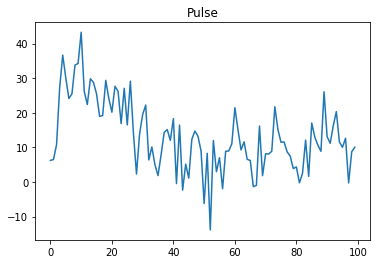

In [12]:
for indx, row in tqdm_notebook(gp_table.iterrows()):
    pulse = np.loadtxt(row['fName'], skiprows=4)
    plt.close()
    plt.title(row['Type'])
    plt.plot(pulse)

    if row['Type'] == 'Pulse':
        plt.savefig('./pulses/' + row['Date'] + '_plot_' + str(indx) + '.png',
                    format='png')
    elif row['Type'] == 'Noise':
        plt.savefig('./trash/' + row['Date'] + '_plot_' + str(indx) + '.png',
                    format='png')
    else:
        print('Alert! Something wrong!!!')